# Simulated EEG multiverse

We first define the forking paths:

In [1]:
from comet.multiverse import Multiverse

forking_paths = {
    "software": ["MNE", "FieldTrip", "EEGLab"],
    "resampling": [250, 500, 512],
    "stimulation": ["IAF", "9", "10", "11"],
    "electrode": ["Pz", "O1", "O2", "P3", "P4"],
}

The template script then creates systematically varying artificial data by adding some "signal" + noise to a baseline value :

In [2]:
def analysis_template():
    import comet
    import numpy as np

    base_value = 10
    if {{software}} == "EEGlab":
        base_value += 2
    if {{stimulation}} == "IAF":
        base_value += 5
    if {{electrode}} == "Pz":
        base_value += 7
    if {{stimulation}} == "IAF" and {{electrode}} == "Pz":
        base_value += 2

    # Generate 50 outcome values (mock differences in alpha power)
    power_diffs = [base_value + np.random.normal(0, 35) for _ in range(50)]

    result = {
        "power_diffs": [round(power_diff, 3) for power_diff in power_diffs],
    }

    comet.utils.save_universe_results(result)

You can then create and visualize the multiverse:

,Universe,Decision 1,Value 1,Decision 2,Value 2,Decision 3,Value 3,Decision 4,Value 4
0,Universe_1,software,MNE,resampling,250,stimulation,IAF,electrode,Pz
1,Universe_2,software,MNE,resampling,250,stimulation,IAF,electrode,O1
2,Universe_3,software,MNE,resampling,250,stimulation,IAF,electrode,O2
3,Universe_4,software,MNE,resampling,250,stimulation,IAF,electrode,P3
4,Universe_5,software,MNE,resampling,250,stimulation,IAF,electrode,P4
...,...,...,...,...,...,...,...,...,...
175,Universe_176,software,EEGLab,resampling,512,stimulation,11,electrode,Pz
176,Universe_177,software,EEGLab,resampling,512,stimulation,11,electrode,O1
177,Universe_178,software,EEGLab,resampling,512,stimulation,11,electrode,O2
178,Universe_179,software,EEGLab,resampling,512,stimulation,11,electrode,P3


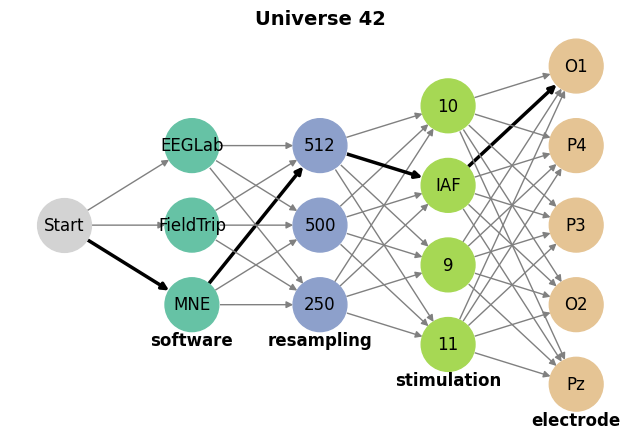

In [3]:
mverse = Multiverse(name="example_mv_eeg_sim")
mverse.create(analysis_template, forking_paths)
mverse.summary()
mverse.visualize(universe=42)

And subsequently run it:

In [4]:
#mverse.run(parallel=8)

Once completed, the results can be visualised in a specification curve:

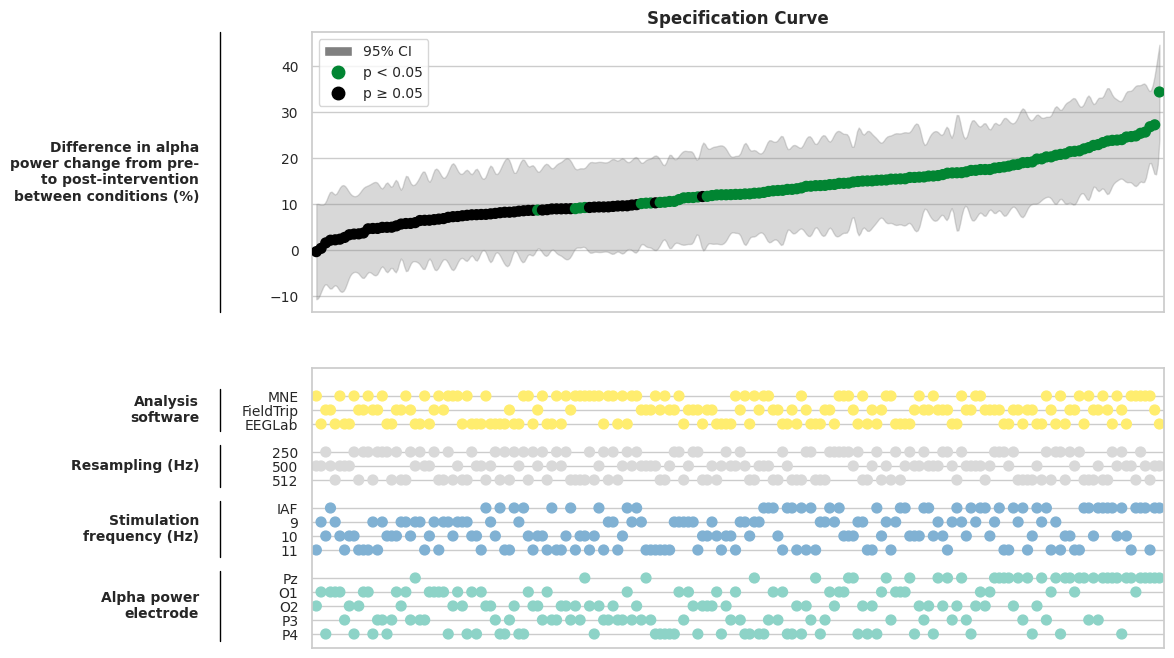

In [5]:
# Custom labels for the specification curve can be provided as a dict
name_map = {
    "power_diffs": "Difference in alpha\npower change from pre-\nto post-intervention\nbetween conditions (%)",
    "software": "Analysis\nsoftware",
    "stimulation": "Stimulation\nfrequency (Hz)",
    "electrode": "Alpha power\nelectrode",
    "resampling": "Resampling (Hz)"
}
mverse.specification_curve(measure="power_diffs", name_map=name_map, p_value=0.05, ci=95, smooth_ci=True, \
                               cmap="Set3", figsize=(11,8), fontsize=10, height_ratio=[1,1], ftype="pdf")

You can access the results from the multiverse analysis for either all universes, or for a single universe:

In [6]:
# Get results for all universes as a nested dict
results = mverse.get_results()
print("Universe 1 results:", results["universe_1"]["power_diffs"])

# Get results for a specific universe
results = mverse.get_results(universe=1)
print("Universe 1 results:", results["power_diffs"])

# Get all results as a pandas DataFrame
results = mverse.get_results(as_df=True)
results

Universe 1 results: [-53.747, 30.131, -49.349, 35.231, 8.288, 29.359, 50.593, -4.955, 46.256, 94.665, 49.347, 48.438, 56.479, 71.632, -19.893, 22.358, 10.253, 8.901, 55.51, 14.98, 62.417, 35.109, -54.498, 6.062, 32.629, 41.855, 71.636, 53.169, 46.737, 44.962, 56.55, 28.586, -44.193, 83.36, 23.409, 23.523, -13.291, -25.712, 58.228, 44.104, 23.46, 3.228, -37.365, -20.372, 73.855, -21.994, 57.371, 34.079, 8.339, 69.662]
Universe 1 results: [-53.747, 30.131, -49.349, 35.231, 8.288, 29.359, 50.593, -4.955, 46.256, 94.665, 49.347, 48.438, 56.479, 71.632, -19.893, 22.358, 10.253, 8.901, 55.51, 14.98, 62.417, 35.109, -54.498, 6.062, 32.629, 41.855, 71.636, 53.169, 46.737, 44.962, 56.55, 28.586, -44.193, 83.36, 23.409, 23.523, -13.291, -25.712, 58.228, 44.104, 23.46, 3.228, -37.365, -20.372, 73.855, -21.994, 57.371, 34.079, 8.339, 69.662]


,universe,power_diffs,decisions
1,universe_1,"[-53.747, 30.131, -49.349, 35.231, 8.288, 29.3...","{'Decision 1': 'software', 'Value 1': 'MNE', '..."
2,universe_2,"[-73.596, 91.563, 28.628, 84.26, 51.855, 5.534...","{'Decision 1': 'software', 'Value 1': 'MNE', '..."
3,universe_3,"[14.594, 40.93, -5.02, 75.759, 30.296, 9.386, ...","{'Decision 1': 'software', 'Value 1': 'MNE', '..."
4,universe_4,"[58.501, 51.798, 34.951, 35.423, 9.368, 42.643...","{'Decision 1': 'software', 'Value 1': 'MNE', '..."
5,universe_5,"[-2.357, 0.177, -43.351, 15.879, -8.225, -31.2...","{'Decision 1': 'software', 'Value 1': 'MNE', '..."
...,...,...,...
176,universe_176,"[14.177, 90.803, -4.129, 29.117, -2.553, -3.43...","{'Decision 1': 'software', 'Value 1': 'EEGLab'..."
177,universe_177,"[9.805, -21.372, -48.089, 42.66, 12.163, -17.7...","{'Decision 1': 'software', 'Value 1': 'EEGLab'..."
178,universe_178,"[-78.791, 25.866, -52.051, 105.705, 31.473, 26...","{'Decision 1': 'software', 'Value 1': 'EEGLab'..."
179,universe_179,"[4.783, 41.969, -3.721, -27.347, -13.783, 1.60...","{'Decision 1': 'software', 'Value 1': 'EEGLab'..."
